In [28]:
%pip install langchain_groq
import os
os.environ["API_KEY"] = "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"

Note: you may need to restart the kernel to use updated packages.


In [29]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="llama3-70b-8192",api_key=os.environ["API_KEY"])

In [30]:
%pip install langgraph
from langgraph.graph import StateGraph,MessagesState, START, END
from langgraph.graph.message import add_messages
from typing import Annotated, Literal, TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AnyMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

Note: you may need to restart the kernel to use updated packages.


In [31]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [32]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

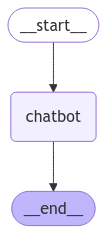

In [33]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [35]:
input={"messages":["hi, my name is Kevin"]}

In [36]:
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is Kevin', additional_kwargs={}, response_metadata={}, id='256edd9b-0276-4f77-a5ae-5f4081db7752'),
  AIMessage(content="Hi Kevin! It's nice to meet you. Is there something I can help you with or would you like to chat for a bit?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 16, 'total_tokens': 45, 'completion_time': 0.083472823, 'prompt_time': 0.003416624, 'queue_time': 0.015528904, 'total_time': 0.086889447}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-ea69b7bd-64db-49bb-8bb3-a905c9796f6d-0', usage_metadata={'input_tokens': 16, 'output_tokens': 29, 'total_tokens': 45})]}

In [37]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hi Kevin! It's nice to meet you. Is there something I can help you with, or would you like to chat about something in particular?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 16, 'total_tokens': 47, 'completion_time': 0.089058297, 'prompt_time': 0.003511814, 'queue_time': 0.065373335, 'total_time': 0.092570111}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-a62e04a6-91f0-48af-81e2-14b364353e57-0', usage_metadata={'input_tokens': 16, 'output_tokens': 31, 'total_tokens': 47})]}


